## P452 - Computational Project 

In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

fig_path = "figures/"
fig_save = False

### Implementation (v1.0) 

In [ ]:
def simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, dimension = 1, mode = 'monoatomic', iterations_to_save = None):
    '''
    This function simulate the lattice vibrations of a 1D monoatomic or diatomic lattice.
    
    Parameters:
    -----------
    N : int
        Number of lattice points.
    T : float
        Total time to simulate.
    Nt : int
        Number of time steps.
    V_X_0 : callable
        function that returns the initial velocity and perturbation of the atoms.
    dxdt : callable
        function that describes the time derivative of the perturbation.
    ddXddt : callable
        function that describes the time derivative of the velocity.
    dimension : int
        Dimension of the lattice.
    mode : str
        Type of lattice. It can be 'monoatomic' or 'diatomic'.
    iterations_to_save : list
        List of iterations to save the solution. If None, it saves the initial and final states.
        if 'all', it saves all the states.
        
    Returns:
    --------
    V_X_list : array
        Array with the solution of the lattice vibrations.
    '''
    
    
    dt = T / Nt  # Temporal step size
    
    # Create arrays to store the solution in time
    V_X_list = []

    # creating initial conditions
    V_X = V_X_0(N)
    
    if iterations_to_save is None:
        iterations_to_save = [0, Nt]
    elif iterations_to_save == 'all':
        iterations_to_save = list(range(0, Nt + 1))

    if 0 in iterations_to_save:
        V_X_list.append(np.copy(V_X))
    
    #--------- RK4 time-stepping block ---------#
    for n in tqdm(range(Nt)):
        # Compute spatial derivatives

        k1_X = dXdt(V_X[0][1:-1], V_X[1][1:-1], n * dt)
        k1_V = ddXddt(V_X[0][1:-1], V_X[1][1:-1], n * dt)
        
        k2_X = dXdt(V_X[0][1:-1] + (0.5 * dt * k1_X), V_X[1][1:-1] + (0.5 * dt * k1_V), (n * dt) + (0.5 * dt))
        k2_V = ddXddt(V_X[0][1:-1] + (0.5 * dt * k1_X), V_X[1][1:-1] + (0.5 * dt * k1_V), (n * dt) + (0.5 * dt))
        
        k3_X = dXdt(V_X[0][1:-1] + (0.5 * dt * k2_X), V_X[1][1:-1] + (0.5 * dt * k2_V), (n * dt) + (0.5 * dt))
        k3_V = ddXddt(V_X[0][1:-1] + (0.5 * dt * k2_X), V_X[1][1:-1] + (0.5 * dt * k2_V), (n * dt) + (0.5 * dt))
        
        k4_X = dXdt(V_X[0][1:-1] + (dt * k3_X), V_X[1][1:-1] + (dt * k3_V), (n * dt) + dt)
        k4_V = ddXddt(V_X[0][1:-1] + (dt * k3_X), V_X[1][1:-1] + (dt * k3_V), (n * dt) + dt)
        
        V_X[0][1:-1] = V_X[0][1:-1] + (dt / 6.0) * (k1_X + (2 * k2_X) + (2 * k3_X) + k4_X)
        V_X[1][1:-1] = V_X[1][1:-1] + (dt / 6.0) * (k1_V + (2 * k2_V) + (2 * k3_V) + k4_V)
        
        if (n + 1) in iterations_to_save:
            V_X_list.append(np.copy(V_X))
    #------------------------------------------#
    
    V_X_list = np.array(V_X_list)
    
    return V_X_list

In [3]:
def animate_lattice_vbrations_1D(X_list, N, T, Nt, a, frames_per_second = 20, time_scale_to = 10, file_name = 'lattice_vibrations_test.gif'):
    positions = np.linspace(1, N, N) * a
    times = np.linspace(0, T, Nt + 1)

    X_list_with_positions = np.zeros(X_list.shape)
    for i, X in enumerate(X_list):
        X_list_with_positions[i] = X + positions
        
        # making an animation of the lattice vibrations
    import matplotlib.animation as animation

    fig = plt.figure(figsize=(10, 5))
    plt.scatter(positions, np.zeros(N),  s=20, color='b', label='Eqlbm positions', alpha=0.5)
    lines = plt.scatter([],[], s=20, color='r', label='Vibrating atom')

    plt.xlim(np.min(X_list_with_positions) - a, np.max(X_list_with_positions) + a)
    plt.ylim(-1, 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
    y = np.zeros(N)

    # frames_per_second = 20
    time_scale = int(T / time_scale_to)

    total_frames = int(np.floor((frames_per_second * T) / time_scale))
    frame_skip = int(np.floor((Nt / total_frames)))

    print(f'Total frames: {total_frames}')
    print(f'Frame skip: {frame_skip}')

    def animate(i):
        j = (i * frame_skip) + 1
        lines.set_offsets(np.column_stack((X_list_with_positions[j], y)))
        # displaying the time
        plt.title(f'Lattice Vibrations, t = {times[j]:.2f}')
        return lines,

    ani = animation.FuncAnimation(fig, animate, frames=total_frames)

    # gif file
    if True:
        ani.save(fig_path + file_name, writer='pillow', fps=frames_per_second)
        
    plt.show()

### Trying the RK4 method on an alternate system to test

In [48]:
def simulate_Lattice_vibrations(N, T, Nt, V_X_0, dXdt, ddXddt, dimension = 1, mode = 'monoatomic', iterations_to_save = None):
    '''
    This function simulate the lattice vibrations of a 1D monoatomic or diatomic lattice.
    
    Parameters:
    -----------
    N : int
        Number of lattice points.
    T : float
        Total time to simulate.
    Nt : int
        Number of time steps.
    V_X_0 : callable
        function that returns the initial velocity and perturbation of the atoms.
    dxdt : callable
        function that describes the time derivative of the perturbation.
    ddXddt : callable
        function that describes the time derivative of the velocity.
    dimension : int
        Dimension of the lattice.
    mode : str
        Type of lattice. It can be 'monoatomic' or 'diatomic'.
    iterations_to_save : list
        List of iterations to save the solution. If None, it saves the initial and final states.
        if 'all', it saves all the states.
        
    Returns:
    --------
    V_X_list : array
        Array with the solution of the lattice vibrations.
    '''
    
    
    dt = T / Nt  # Temporal step size
    
    # Create arrays to store the solution in time
    V_X_list = []

    # creating initial conditions
    V_X = V_X_0(N)
    
    if iterations_to_save is None:
        iterations_to_save = [0, Nt]
    elif iterations_to_save == 'all':
        iterations_to_save = list(range(0, Nt + 1))

    if 0 in iterations_to_save:
        V_X_list.append(np.copy(V_X))
    
    temp_VX = np.zeros((2, N))
    #--------- RK4 time-stepping block ---------#
    for n in tqdm(range(Nt)):
        # Compute spatial derivatives

        k1_X = dXdt(V_X[0], V_X[1], n * dt)
        k1_V = ddXddt(V_X[0], V_X[1], n * dt)
        
        k2_X = dXdt(V_X[0] + (0.5 * dt * k1_X), V_X[1] + (0.5 * dt * k1_V), (n * dt) + (0.5 * dt))
        k2_V = ddXddt(V_X[0] + (0.5 * dt * k1_X), V_X[1] + (0.5 * dt * k1_V), (n * dt) + (0.5 * dt))
        
        k3_X = dXdt(V_X[0] + (0.5 * dt * k2_X), V_X[1] + (0.5 * dt * k2_V), (n * dt) + (0.5 * dt))
        k3_V = ddXddt(V_X[0] + (0.5 * dt * k2_X), V_X[1] + (0.5 * dt * k2_V), (n * dt) + (0.5 * dt))
        
        k4_X = dXdt(V_X[0] + (dt * k3_X), V_X[1] + (dt * k3_V), (n * dt) + dt)
        k4_V = ddXddt(V_X[0] + (dt * k3_X), V_X[1] + (dt * k3_V), (n * dt) + dt)
        
        V_X[0] = V_X[0] + (dt / 6.0) * (k1_X + (2 * k2_X) + (2 * k3_X) + k4_X)
        V_X[1] = V_X[1] + (dt / 6.0) * (k1_V + (2 * k2_V) + (2 * k3_V) + k4_V)
        
        if (n + 1) in iterations_to_save:
            V_X_list.append(np.copy(V_X))
    #------------------------------------------#
    
    V_X_list = np.array(V_X_list)
    
    return V_X_list

In [49]:
N = 1
a = 1 # Lattice spacing
T = 15
Nt = 150

def V_X_0(N):
    # print(N)
    atomic_indices = np.linspace(1, N, N) 
    
    V_X = np.zeros((2,N))
    
    # V_X[0] = (a/2) * np.sin((atomic_indices - 1) * np.pi / (N - 1)) # initial perturbation
    V_X[0] = np.ones(N) #
    # V_X[0][0] = 0
    # V_X[0][-1] = 0
    
    V_X[1] = - np.ones(N)
    return V_X

def f1(X, V,t):
    return V

def f2(X, V,t):
    return ((-0.1*V) - (1*X))

In [50]:
V_X_list = simulate_Lattice_vibrations(N, T, Nt, V_X_0, f1, f2, iterations_to_save = 'all')
print(V_X_list.shape)

100%|██████████| 150/150 [00:00<00:00, 14792.64it/s]

(151, 2, 1)


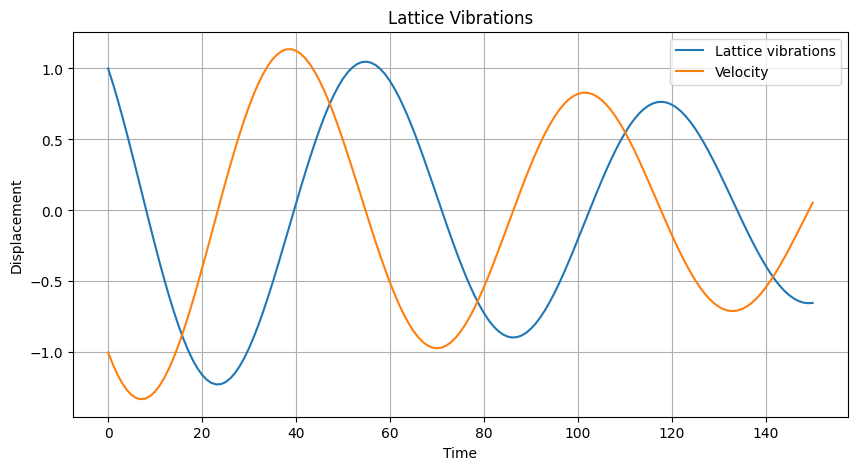

In [52]:
X_list = V_X_list[:,0]
V_list = V_X_list[:,1]
X_list = X_list.tolist()
V_list = V_list.tolist()

# plotting the lattice vibrations
plt.figure(figsize=(10, 5))
plt.plot(X_list, label='Lattice vibrations')
plt.plot(V_list, label='Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Lattice Vibrations')
plt.grid()
plt.legend()
if fig_save:
    plt.savefig(fig_path + 'lattice_vibrations.png')
plt.show()

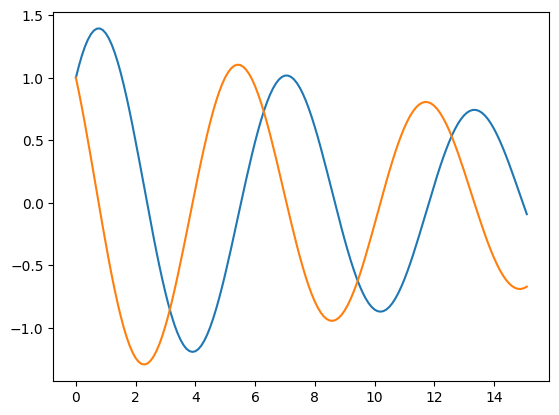

In [31]:
def RK4_coupled(dydxlist,x0,y0list,x1,dx): # original piece of code

    if len(dydxlist) != len(y0list):
        return None

    n = len(y0list)
    k1 = [0]*n
    k2 = [0]*n
    k3 = [0]*n
    k4 = [0]*n
    tempy0list = [0]*n

    datY = [y0list[:]]
    datX = [x0]

    while x0 < x1:
        for i in range(n):
            k1[i] = dx*dydxlist[i](y0list,x0)
        
        for i in range(n):
            tempy0list[i] = y0list[i] + (k1[i] / 2)
        for i in range(n):
            k2[i] = dx*dydxlist[i](tempy0list, (x0 + (dx/2)))

        for i in range(n):
            tempy0list[i] = y0list[i] + (k2[i] / 2)
        for i in range(n):
            k3[i] = dx*dydxlist[i](tempy0list, (x0 + (dx/2)))
            
        for i in range(n):
            tempy0list[i] = y0list[i] + k3[i]
        for i in range(n):
            k4[i] = dx*dydxlist[i](tempy0list, (x0 + dx))
        # print(k1,k2,k3,k4,'\n\n')

        for i in range(n):
            y0list[i] += ((k1[i] + (2 * k2[i]) + (2 * k3[i]) + (k4[i])) / 6)
        x0 += dx
        
        # print(y0list,x0,'\n\n')

        datY.append(y0list[:])
        datX.append(x0)
    # print(datX,datY)
    return datX, datY


def f1(xvlist,t):
    return xvlist[1]

def f2(xvlist,t):
    return ((-0.1*xvlist[1]) - (1*xvlist[0]))

dydx = [f1,f2]


X,Y = RK4_coupled(dydx,0,[1,1],15,0.1)
plt.plot(X,Y,'-',ms=2)
plt.show()

In [12]:
import numpy as np

A = [[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
     [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
     [[19, 20, 21], [22, 23, 24], [25, 26, 27]],
     [[28, 29, 30], [31, 32, 33], [34, 35, 36]]]

A = np.array(A)
print(A)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]

 [[28 29 30]
  [31 32 33]
  [34 35 36]]]
